# MIS 583 Assignment 6: Text Sentiment Classification with Prompt Learning

Before we start, please put your name and SID in following format: <br>
: LASTNAME Firstname, ?00000000   //   e.g.) 李晨愷, M114020035

**Your Answer:**   
Hi I'm 危湘妤, B104020011

## Overview

**Sentiment Classification** is an automated process of identifying opinions in text and labeling them as positive or negative based on the emotions customers express within them.

In Task 1, you need to fine-tune a pre-trained language model (e.g., BERT) to predict the sentiment of given tweets.

In Task 2, we employ prompts to enable the model to perform sentiment analysis through in-context learning, eliminating the need for additional training.

In Task 3, you will use the method called LM-BFF to utilize the model in generating the optimal template and verbalizer autonomously.


# Notice
**You are not allow to use the model like GPT family or pre-trained weight using SST-2 and twitter dataset!!!!!!!!!!!!!!!!!**

You can use BERT and RoBERTa encoder model

##  Versions of used packages

We will check PyTorch version to make sure everything work properly.  
We use `python==3.7.14`, `torch==1.12.1+cu113` and `torchvision==0.13.1+cu113`.  
This is the default version in Google Colab.

In [1]:
import sys
import torch
import torchvision
print('python', sys.version.split('\n')[0])
print('torch', torch.__version__)
print('torchvision', torchvision.__version__)

python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
torch 2.1.0+cu121
torchvision 0.16.0+cu121


# Task 1: Text Sentiment Classification (40 points)

In this task, you need to fine-tune a pre-trained language model (e.g., BERT or RoBERTa encoder) to predict the sentiment of given tweets.


## Loading Model and Data

First, let's talk about the model. The Hugging Face team has created an amazing framework called "transformers" for NLP tasks. It includes many state-of-the-art machine learning models for PyTorch, TensorFlow, and JAX.

To start with this package, follow [this link to installation and a basic tutorial](https://pytorch.org/hub/huggingface_pytorch-transformers/).

In [2]:
# you might need some additional installations there
!echo happy installation
!pip -V
!pip install grpcio
!pip install google-auth
!pip install protobuf==3.9.2
!pip install pyprind
!pip install tqdm boto3 requests regex sentencepiece sacremoses

happy installation
pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.4.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.9.2 which is incompatible.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 3.9.2 which is incompatible.
google-cloud-aiplatform 1.38.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 12.2 MB/s eta 0:00:00


In [39]:
from torch import nn

#########################################################################
#            Loading tokenizer and model from transformer               #
#########################################################################
# Bert
# from transformers import BertTokenizer, BertForSequenceClassification

# bert_type = 'bert-base-uncased'

# tokenizer = BertTokenizer.from_pretrained(bert_type)
# model = BertForSequenceClassification.from_pretrained(bert_type)

# Roberta
from transformers import RobertaTokenizer, RobertaForSequenceClassification

bert_type = 'roberta-base'

tokenizer = RobertaTokenizer.from_pretrained(bert_type)

model = RobertaForSequenceClassification.from_pretrained(bert_type)

# finetune from the output from bert to your task
model.classifier.out_proj = nn.Linear(in_features=768, out_features=3, bias=True)
# model.classifier = nn.Linear(768, 3, bias=True)
# dropout_rate = 0.1  # 设置你想要的dropout率
# model.classifier = nn.Sequential(
#     nn.Dropout(dropout_rate),
#     nn.Linear(768, 3, bias=True)
# )
#########################################################################
#                          End of your code                             #
#########################################################################

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## How to Get Data

Please open the file `twitter_sentiment.zip`, creat shortcut to your Google Drive.

1. open [LINK of Google Drive](https://drive.google.com/file/d/19Ty2lVAm55VL5QIM-MMQhhOzWXeMtxeV/view?usp=sharing)
2. Click "Add shortcut to Drive" in the top-right corner.
3. Select the location where you want to place the shortcut.
4. Click Add shortcut.

After above procedures, we have a shortcut of zip file of dataset.  
We can access this in colab after granting the permission of Google Drive.

---

請先到共用雲端硬碟將檔案 `twitter_sentiment.zip`，建立捷徑到自己的雲端硬碟中。

> 操作步驟
1. 點開雲端[連結](https://drive.google.com/file/d/19Ty2lVAm55VL5QIM-MMQhhOzWXeMtxeV/view?usp=sharing)
2. 點選右上角「新增雲端硬碟捷徑」
3. 點選「我的雲端硬碟」
4. 點選「新增捷徑」

完成以上流程會在你的雲端硬碟中建立一個檔案的捷徑，接著我們在colab中取得權限即可使用。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Unzip Data

解壓縮 `twitter_sentiment.zip` 後可以發現裡面有三個csv檔。

- `train.csv`, `test.csv` and `val.csv`

Training set 有 **10248** 筆資料.  
Validation set 有 **1317** 筆資料.  
Testing set 有 **3075** 筆資料.  

注意: 若有另外設定存放在雲端硬碟中的路徑，請記得本處路徑也須做更動。

In [5]:
# !unzip -qq ./drive/MyDrive/Deep_Learning/A6/twitter_sentiment.zip -d ./drive/MyDrive/Deep_Learning/A6

In [4]:
import os
# 要切換的目錄
new_directory = '/content/drive/MyDrive/Deep_Learning/A6'

# 更改當前工作目錄
os.chdir(new_directory)

# 更新當前工作目錄
current_path = os.getcwd()
print("新的當前工作目錄：", current_path)

新的當前工作目錄： /content/drive/MyDrive/Deep_Learning/A6


# Loading the dataset

In [8]:
# Utility function to extract text and label from csv file
def get_texts(f_name='./twitter_sentiment', mode='train'):
    text_list = []
    label_list = []

    f_path = os.path.join(f_name, '{}.csv'.format(mode))
    with open(f_path) as f:
        reader = csv.DictReader(f)
        for line in reader:
            text_list.append(line['text'])
            if mode != 'test':
                label_list.append(int(line['sentiment_label']))

    return text_list, label_list

In [9]:
import os
import csv
import torch
from torch.utils.data import Dataset, DataLoader
class TwitterDataset(Dataset):
    def __init__(self, f_name='./twitter_sentiment', mode='train'):
        self.mode = mode

        text_list, label_list = get_texts(f_name, mode)
        print('mode', mode, 'has', len(text_list), 'datas')
        text_list = tokenizer(text_list,
                             truncation=True, padding=True,
                             return_tensors='pt')

        self.text_list = text_list['input_ids']
        self.mask_list = text_list['attention_mask']

        self.label_list = label_list

    def __getitem__(self, idx):
        text = self.text_list[idx]
        mask = self.mask_list[idx]
        if self.mode == 'test':
            return text, mask
        label = torch.tensor(self.label_list[idx])
        return text, mask, label

    def __len__(self):
        return len(self.text_list)

## `DataLoader`

`torch.utils.data.DataLoader` define how to sample from `dataset` and some other function like:
+ `shuffle` : set to `True` to have the data reshuffled at every epoch
+ `batch_size` : how many samples per batch to load

See [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for more details

In [44]:
dataset_train = TwitterDataset(mode='train')
dataset_val = TwitterDataset(mode='val')
dataset_test = TwitterDataset(mode='test')

batch_size = 32
train_data = DataLoader(dataset_train, batch_size=batch_size,
                       shuffle=True)
val_data = DataLoader(dataset_val, batch_size=batch_size // 2,
                       shuffle=False)
test_data = DataLoader(dataset_test, batch_size=batch_size // 2,
                       shuffle=False)

mode train has 10248 datas
mode val has 1317 datas
mode test has 3075 datas


In [45]:
t = tokenizer.convert_ids_to_tokens(dataset_train[0][0]) # converts a sequence of numeric IDs in the training dataset into their corresponding tokens using the specified tokenizer.
print('token', t)
print('token to s', tokenizer.convert_tokens_to_string(t)) # converts a sequence of tokens (t) back into the original text string using the specified tokenizer.

token ['<s>', '@', 'united', 'ĠI', 'Ġhave', 'Ġnever', 'Ġbeen', 'Ġmislead', 'Ġby', 'Ġa', 'Ġcompany', 'Ġas', 'Ġmany', 'Ġtimes', 'Ġas', 'ĠI', 'Ġhave', 'Ġthis', 'Ġweek', 'Ġby', 'ĠUnited', 'ĠAirlines', '!', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>'

# Define loss and optimizer

In [47]:
device = torch.device('cuda')

from torch import nn
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

# Utility Function

In [48]:
def accuracy(raw_preds, y):
    preds = raw_preds.argmax(dim=1)
    acc = (preds == y).sum()
    return acc

# Train function

In [49]:
from tqdm import tqdm
import matplotlib.pyplot as plt

train_loss_list = []
val_loss_list = []

def train(model, data, optimizer, criterion):
    model.train()

    epoch_loss = 0
    epoch_acc = 0
    total = 0
    for text, mask, label in tqdm(data, total=len(data)):
        text = text.to(device)
        mask = mask.to(device)
        label = label.to(device)

        #########################################################################
        #                          Testing process                              #
        #########################################################################
        # 1. Clean the gradients of optimizer
        optimizer.zero_grad()
        # 2. Put correct variables into model
        outputs = model(text, attention_mask=mask)
        # 3. Get prediction
        preds = outputs.logits
        # 4. Evaluate by criterion and accuracy
        loss = criterion(preds, label)
        acc = accuracy(preds, label)
        #########################################################################
        #                          End of your code                             #
        #########################################################################

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        train_loss_list.append(loss.item())
        epoch_acc += acc.item()
        total += len(text)
    return epoch_loss / total, epoch_acc / total

def test(model, data, criterion, log_loss=False):
    model.eval()

    epoch_loss = 0
    epoch_acc = 0
    total = 0
    for text, mask, label in tqdm(data, total=len(data)):
        text = text.to(device)
        mask = mask.to(device)
        label = label.to(device)

        #########################################################################
        #                          Training process                             #
        #########################################################################
        with torch.no_grad():  # 使用torch.no_grad()上下文管理器，以禁用梯度计算
          # 2. Get prediction
          outputs = model(text, attention_mask=mask)
          preds = outputs.logits
          # 3. Evaluate by criterion and accuracy
          loss = criterion(preds, label)
          acc = accuracy(preds, label)

        #########################################################################
        #                          End of your code                             #
        #########################################################################

        epoch_loss += loss.item()
        if log_loss:
            val_loss_list.append(loss.item())
        epoch_acc += acc.item()
        total += len(text)
    return epoch_loss / total, epoch_acc / total

# class for monitoring train and test acc/loss
class Meter:
    def __init__(self):
        self.train_loss_list = []
        self.train_acc_list = []
        self.val_loss_list = []
        self.val_acc_list = []

    def update(self, train_loss, train_acc, val_loss, val_acc):
        self.train_loss_list.append(train_loss)
        self.train_acc_list.append(train_acc)
        self.val_loss_list.append(val_loss)
        self.val_acc_list.append(val_acc)

    def plot(self):
        x = range(len(self.train_loss_list))
        plt.plot(x, self.train_loss_list)
        plt.plot(x, self.val_loss_list, color='r')
        plt.legend(['train_loss', 'val_loss'])
        plt.show()
        plt.plot(x, self.train_acc_list)
        plt.plot(x, self.val_acc_list, color='r')
        plt.legend(['train_acc', 'val_acc'])
        plt.show()

# Start Training

In [52]:
#########################################################################
#                          Hyper-parameters                             #
#########################################################################
max_epoch = 5
log_interval = 1
best_acc = 0
#########################################################################
#                          End of your code                             #
#########################################################################

m = Meter()

for epoch in range(1, max_epoch + 1):
    train_loss, train_acc = train(model, train_data, optimizer, criterion)
    val_loss, val_acc = test(model, val_data, criterion, log_loss=True)

    if epoch % log_interval == 0:
        print('Epoch {} train_loss: {} train_acc: {}'.format(
            epoch, train_loss, train_acc
        ))
        print('Epoch {} val_loss:  {} val_acc : {}'.format(
            epoch, val_loss, val_acc
        ))

    m.update(train_loss, train_acc, val_loss, val_acc)

    # model checkpoint
    torch.save(model.state_dict(), 'ckpts/e{}.pt'.format(epoch))
    if val_acc > best_acc:
        best_model = model
        best_acc = val_acc
        print('-'*10, 'e', epoch, 'save best model', '-'*10)

100%|██████████| 83/83 [00:04<00:00, 17.56it/s]


Epoch 1 train_loss: 0.003336603440056067 train_acc: 0.9642857142857143
Epoch 1 val_loss:  0.03245168613519551 val_acc : 0.8519362186788155
---------- e 1 save best model ----------


100%|██████████| 83/83 [00:04<00:00, 17.74it/s]


Epoch 2 train_loss: 0.0025550798821027823 train_acc: 0.9737509758001561
Epoch 2 val_loss:  0.03970164918795443 val_acc : 0.8352315869400152


100%|██████████| 83/83 [00:04<00:00, 17.84it/s]


Epoch 3 train_loss: 0.002184439279741748 train_acc: 0.9786299765807962
Epoch 3 val_loss:  0.04055907173703114 val_acc : 0.8473804100227791


100%|██████████| 83/83 [00:04<00:00, 17.77it/s]


Epoch 4 train_loss: 0.001812735963916329 train_acc: 0.9824355971896955
Epoch 4 val_loss:  0.03956066874916974 val_acc : 0.8663629460895975
---------- e 4 save best model ----------


100%|██████████| 83/83 [00:04<00:00, 17.66it/s]


Epoch 5 train_loss: 0.0014615521244398463 train_acc: 0.985655737704918
Epoch 5 val_loss:  0.05082717946504795 val_acc : 0.8420652999240699


100%|██████████| 83/83 [00:04<00:00, 17.69it/s]


Epoch 6 train_loss: 0.0016256246638105699 train_acc: 0.9828259172521467
Epoch 6 val_loss:  0.04510284655318357 val_acc : 0.8413059984813971


100%|██████████| 83/83 [00:04<00:00, 17.56it/s]


Epoch 7 train_loss: 0.0015674204491677743 train_acc: 0.9838017174082748
Epoch 7 val_loss:  0.04439527188926644 val_acc : 0.8413059984813971


100%|██████████| 83/83 [00:04<00:00, 17.69it/s]


Epoch 8 train_loss: 0.001281607907426643 train_acc: 0.9874121779859485
Epoch 8 val_loss:  0.04938582626895183 val_acc : 0.8443432042520881


100%|██████████| 83/83 [00:04<00:00, 17.73it/s]


Epoch 9 train_loss: 0.001229668036074849 train_acc: 0.9873145979703357
Epoch 9 val_loss:  0.04889030825999854 val_acc : 0.8466211085801063


100%|██████████| 83/83 [00:04<00:00, 17.54it/s]


Epoch 10 train_loss: 0.0008661519027210843 train_acc: 0.9908274785323966
Epoch 10 val_loss:  0.056145480706527244 val_acc : 0.8496583143507973


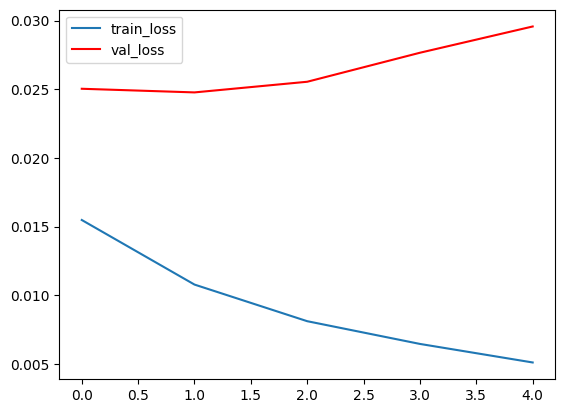

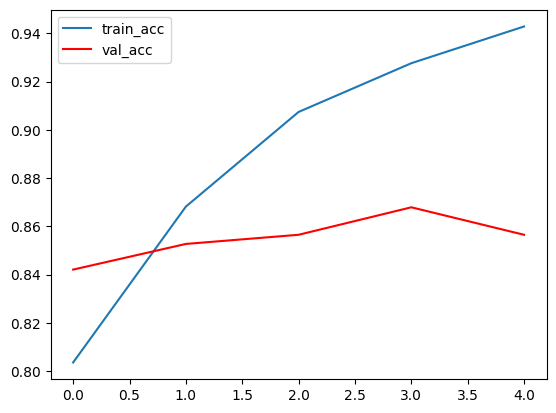

In [51]:
# plot them out
m.plot()

# Prediction

Predict the results based on testing set. Upload to [Kaggle](https://www.kaggle.com/t/f072e95f51bc48978225941dba218241).


In [54]:
best_model = model
best_model.load_state_dict(torch.load('ckpts/roberta_8678.pt'))

<All keys matched successfully>

In [55]:
best_model.eval()

total_out = []
for text, mask in tqdm(test_data, total=len(test_data)):
    text = text.to(device)
    mask = mask.to(device)

    output = best_model(text, mask)
    pred = output.logits
    pred = torch.argmax(pred, dim=1)
    total_out.append(pred)

total_out = torch.cat(total_out).cpu().numpy().tolist()

with open('ckpts/pred.csv', 'w') as f:
    f.write('index,sentiment_label\n')
    for i, pred in enumerate(total_out):
        f.write('{},{}\n'.format(i, pred))

100%|██████████| 193/193 [00:10<00:00, 17.91it/s]


# Task 2: In-Context learning (32 points)

In this task, you will learn how to perform sentiment classification using **prompts** without the need for training.

In [5]:
import torch
import pyprind
import numpy as np
import pandas as pd
import torch.nn as nn
from transformers import BertConfig, BertTokenizer, BertForMaskedLM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Loading model and setup

In [14]:
#########################################################################
#         TODO: Design your own template(prefix) and verbalizer         #
#########################################################################
class Config:
    def __init__(self):
        # Zero-shot learning template
        # self.prefix = "Sentence for emotion: This sentence is [MASK]." # you can modify this line

        # One-shot
        # self.prefix = (
        #     "Sentence for emotion: This sentence is negative. Walking into the office on Monday morning feels like a never-ending struggle, facing a mountain of tasks and deadlines. [SEP] "
        #     "Sentence for emotion: This sentence is [MASK]."
        # )

        # Few-shot
        self.prefix = (
            "Sentence for emotion: This sentence is negative. Walking into the office on Monday morning feels like a never-ending struggle, facing a mountain of tasks and deadlines. [SEP] "
            "Sentence for emotion: This sentence is neutral. Entering the office on Monday morning, I prepare my to-do list, ready to tackle the tasks for the day. [SEP] "
            "Sentence for emotion: This sentence is positive. Stepping into the office on Monday morning brings a sense of excitement, knowing that new opportunities and achievements await. [SEP] "
            "Sentence for emotion: This sentence is [MASK]."
        )

        self.verbalizer = {
            'positive': 2,
            'negative': 0,
            'neutral': 1
        }

        self.max_seq_length = 512
        self.batch_size = 64


config = Config()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

bert_type = 'bert-base-uncased'

model = BertForMaskedLM.from_pretrained(bert_type, num_labels = 3)

tokenizer = BertTokenizer.from_pretrained(bert_type)

bert_config = BertConfig.from_pretrained(bert_type)

bert = model.from_pretrained(bert_type, config=bert_config).to(device)

#######################################################################
#                        End of your code                             #
#######################################################################

softmax = nn.Softmax(dim=1)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model t

## Obtaion verbalizer ids

In [15]:
# Utility function to obtaion verbalizer ids
def obtain_verbalizer_ids(verbalizer, tokenizer):
    verbalizer_ids = tokenizer.convert_tokens_to_ids(list(verbalizer.keys()))
    index2ids = {i: verbalizer_ids[i] for i in range(len(verbalizer_ids))}
    return verbalizer_ids, index2ids


In [16]:
verbalizer_ids, index2ids = obtain_verbalizer_ids(config.verbalizer, tokenizer)

## Concatenate original text and prefix

In [18]:
# Utility function to concatenate prefix and text
def concatenate_prefix(texts, config):
    ##################################################
    #   TODO: concatenate your own prefix and text   #
    ##################################################
    prefix_texts = [config.prefix + " " + text for text in texts]
    # prefix_texts = [config.prefix.format(text=text) for text in texts]
    ##################################################
    #                 End of your code               #
    ##################################################
    return prefix_texts

In [19]:
def load_data(config):
    # ['texts', 'labels']
    df = pd.read_csv('./twitter_sentiment/train.csv')
    original_texts = df['text'].tolist()
    labels = df['sentiment_label'].tolist()

    texts = concatenate_prefix(original_texts, config)

    return texts, labels


texts, labels = load_data(config)

In [20]:
# Batching of texts and labels for training or processing in batches
def pack_batch(texts, labels, batch_size):
    """
    :param texts: list
    :param labels: list
    :param batch_size: int
    :return batch_X: list
            [[text11, text12, ...], [text21, text22, ...], ...]
    :return batch_y: list
            [[label11, label12, ...], [label21, label22, ...], ...]
    :return batch_count: int
    """
    assert len(texts) == len(labels)

    if len(texts) % batch_size != 0:
        flag = False
        batch_count = int(len(texts) / batch_size) + 1
    else:
        flag = True
        batch_count = int(len(texts) / batch_size)

    batch_X, batch_y = [], []

    if flag:
        for i in range(batch_count):
            batch_X.append(texts[i * batch_size: (i + 1) * batch_size])
            batch_y.append(labels[i * batch_size: (i + 1) * batch_size])
    else:
        for i in range(batch_count):
            if i == batch_count - 1:
                batch_X.append(texts[i * batch_size:])
                batch_y.append(labels[i * batch_size:])
            else:
                batch_X.append(texts[i * batch_size: (i + 1) * batch_size])
                batch_y.append(labels[i * batch_size: (i + 1) * batch_size])

    return batch_X, batch_y, batch_count

In [21]:
batch_X, batch_y, batch_count = pack_batch(texts, labels, config.batch_size)

## Inferencing the model without training

In [22]:
with torch.no_grad():
    predict_all = np.array([], dtype=int)
    labels_all = np.array([], dtype=int)
    pper = pyprind.ProgPercent(batch_count)
    for i in range(batch_count):
        inputs = batch_X[i]
        labels = batch_y[i]

        # Using the BERT tokenizer (tokenizer.batch_encode_plus), adding special tokens, ensuring a maximum sequence length, and handling padding/truncation
        tokens = tokenizer.batch_encode_plus(inputs, add_special_tokens=True,
                                             max_length=config.max_seq_length,
                                             padding='max_length', truncation=True)

        ids = torch.tensor(tokens['input_ids']).to(device)
        attention_mask = torch.tensor(tokens['attention_mask']).to(device)

        # Shape: (batch_size, max_seq_length, vocab_size)
        logits = bert(ids, attention_mask=attention_mask).logits

        mask_token_index = (ids == tokenizer.mask_token_id).nonzero(as_tuple=True)

        # Find [MASK] logits
        # shape: (batch_size, vocab_size)
        masked_logits = logits[mask_token_index[0], mask_token_index[1], :]

        # Extract the logits of the word in the verbalizer at the [MASK] position
        # shape: (batch_size, verbalizer_size)
        verbalizer_logits = masked_logits[:, verbalizer_ids]

        # Construct a pseudo-distribution from the logits in these verbalizers
        pseudo_distribution = softmax(verbalizer_logits)

        #################################################################################
        #   1. Find the index with the maximum probability in the pseudo-distribution   #
        #   2. Convert the index to the corresponding word ID                           #
        #   3. Convert the ID to a token                                                #
        #   4. Find the label corresponding to the token                                #
        #################################################################################

        pred_indices = torch.argmax(pseudo_distribution, dim=1)

        pred_ids = [verbalizer_ids[index] for index in pred_indices]

        pred_tokens = tokenizer.convert_ids_to_tokens(pred_ids)

        pred_labels = [config.verbalizer[token] if token in config.verbalizer else -1 for token in pred_tokens]
        pred_labels = np.array(pred_labels)
        #################################################################################
        #                             End of your code                                  #
        #################################################################################

        predict_all = np.append(predict_all, pred_labels)
        labels_all = np.append(labels_all, labels)

        pper.update()

    acc = accuracy_score(labels_all, predict_all)
    p = precision_score(labels_all, predict_all, average="weighted")
    r = recall_score(labels_all, predict_all, average="weighted")
    f1 = f1_score(labels_all, predict_all, average="weighted")

    print('\n accuracy: %f | precision: %f | recall: %f | f1: %f' % (acc, p, r, f1))

[100 %] Time elapsed: 00:07:26 | ETA: 00:00:00


 accuracy: 0.220141 | precision: 0.653974 | recall: 0.220141 | f1: 0.155925



Total time elapsed: 00:07:26


# Task 3: LM-BFF (45 points)

https://arxiv.org/pdf/2012.15723.pdf

Unlike the previous task, LM-BFF can generate templates and verbalizers automatically.

# Get Data

請先到共用雲端硬碟將檔案 `SST-2.zip`，建立捷徑到自己的雲端硬碟中。

> 操作步驟
1. 點開雲端[連結](https://drive.google.com/file/d/14MDYFasXU94dUE9DjgfcZE61iTRI2007/view?usp=sharing)
2. 點選右上角「新增雲端硬碟捷徑」
3. 點選「我的雲端硬碟」
4. 點選「新增捷徑」

完成以上流程會在你的雲端硬碟中建立一個檔案的捷徑，接著我們在colab中取得權限即可使用。

# Install openprompt

This library provides a standard, flexible and extensible framework to deploy the prompt-learning pipeline.

[OpenPrompt Documentation](https://thunlp.github.io/OpenPrompt/)

In [2]:
!pip install openprompt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.4/146.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.9 MB/s eta 0:00:00


# Import openprompt package

In [3]:
from openprompt.plms import load_plm
from openprompt.prompts.prompt_generator import T5TemplateGenerator
from openprompt.pipeline_base import PromptDataLoader, PromptForClassification
from openprompt.prompts import ManualTemplate
from openprompt.trainer import ClassificationRunner
import copy
import torch
from transformers import  AdamW, get_linear_schedule_with_warmup
import numpy as np

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(


# Setup cuda and whether to perform automatic generation

In [4]:
cuda = True
auto_t = True # Whether to perform automatic template generation
auto_v = True # Whether to perform automatic verbalizer generation

# Load dataset and model

In [6]:
# !unzip -qq ./drive/MyDrive/Deep_Learning/A6/SST-2.zip -d ./drive/MyDrive/Deep_Learning/A6

In [7]:
import os
# 要切換的目錄
new_directory = '/content/drive/MyDrive/Deep_Learning/A6'

# 更改當前工作目錄
os.chdir(new_directory)

# 更新當前工作目錄
current_path = os.getcwd()
print("新的當前工作目錄：", current_path)

新的當前工作目錄： /content/drive/MyDrive/Deep_Learning/A6


In [10]:
from openprompt.data_utils.text_classification_dataset import SST2Processor
dataset = {}
dataset['train'] = SST2Processor().get_train_examples("SST-2/")
dataset['validation'] = SST2Processor().get_dev_examples("SST-2/")
dataset['test'] = SST2Processor().get_test_examples("SST-2/")

In [19]:
#print('load model...')
from openprompt.plms import load_plm
# load mlm model for main tasks
plm, tokenizer, model_config, WrapperClass = load_plm("roberta", "roberta-large")

# load generation model for template generation
template_generate_model, template_generate_tokenizer, template_generate_model_config, template_tokenizer_wrapper = load_plm('t5', 't5-large')

from openprompt.prompts import ManualVerbalizer, ManualTemplate


###################################################################################################################
#   TODO: You need to switch LMBFFTemplateGenerationTemplate or ManualTemplate to                                 #
#         compare auto generate template and manual generate template                                             #
###################################################################################################################
from openprompt.prompts.prompt_generator import LMBFFTemplateGenerationTemplate
########################################
#   LMBFFTemplateGenerationTemplate    #
########################################
import random

if auto_t:
    verbalizer = ManualVerbalizer(tokenizer=tokenizer, num_classes=2, label_words=['terrible','great'])

    # number of demonstrations
    num_demonstrations = 1  # try different number

    demonstrations = []

    for _ in range(num_demonstrations):
        # random choice training set example with label 0
        random_example_1 = random.choice([example for example in dataset['train'] if example.label == 0])

        # random choice training set example with label 1
        random_example_2 = random.choice([example for example in dataset['train'] if example.label == 1])

        demonstration = f'{random_example_1.text_a} It was terrible. {random_example_2.text_a} It was great.'
        demonstrations.append(demonstration)

    # You can modify the demonstrations and try different combinations
    template_text = '{"placeholder": "text_a"} {"mask"} {"meta": "labelword"} {"mask"}.' + ' '.join(demonstrations)
    template = LMBFFTemplateGenerationTemplate(tokenizer=template_generate_tokenizer, verbalizer=verbalizer, text=template_text)
#############################################
#   End of LMBFFTemplateGenerationTemplate  #
#############################################

########################################
#          ManualTemplate              #
########################################
else:
    # number of demonstrations
    num_demonstrations = 1  # try different number

    demonstrations = []

    for _ in range(num_demonstrations):
        # random choice training set example with label 0
        random_example_1 = random.choice([example for example in dataset['train'] if example.label == 0])

        # random choice training set example with label 1
        random_example_2 = random.choice([example for example in dataset['train'] if example.label == 1])

        demonstration = f'{random_example_1.text_a} Sentence for analyze: This sentence is negative. {random_example_2.text_a} Sentence for analyze: This sentence is positive.'
        demonstrations.append(demonstration)

    # ManualTemplate 1
    # template = ManualTemplate(tokenizer=tokenizer, text='{"placeholder":"text_a"} Sentence for analyze: This sentence is {"mask"}.' + ' '.join(demonstrations))
    # verbalizer = ManualVerbalizer(tokenizer=tokenizer, num_classes=2, label_words=['negative','positive'])

    # ManualTemplate 2
    template = ManualTemplate(tokenizer=tokenizer, text='{"placeholder":"text_a"} The emotion conveyed in this text is {"mask"}.' + ' '.join(demonstrations))
    verbalizer = ManualVerbalizer(tokenizer=tokenizer, num_classes=2, label_words=['horrible','wonderful'])

    # ManualTemplate 3
    template = ManualTemplate(tokenizer=tokenizer, text='{"placeholder":"text_a"} It was {"mask"} sentence.' + ' '.join(demonstrations))
    verbalizer = ManualVerbalizer(tokenizer=tokenizer, num_classes=2, label_words=['bad','good'])

#############################################
#          End of ManualTemplate            #
#############################################

###################################################################################################################
#                                           End of your code                                                      #
###################################################################################################################


# view wrapped example
wrapped_example = template.wrap_one_example(dataset['train'][0])
print("dataset:", dataset['train'][0])

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:240: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


dataset: {
  "guid": "train-0",
  "label": 0,
  "meta": {
    "labelword": "terrible"
  },
  "text_a": "nothing happens , and it happens to flat characters .",
  "text_b": "",
  "tgt_text": null
}



In [ ]:
# #print('load model...')
# from openprompt.plms import load_plm

# # load mlm model for main tasks
# plm, tokenizer, model_config, WrapperClass = load_plm("roberta", "roberta-large")

# # load generation model for template generation
# template_generate_model, template_generate_tokenizer, template_generate_model_config, template_tokenizer_wrapper = load_plm('t5', 't5-large')

# from openprompt.prompts import ManualVerbalizer, ManualTemplate

# # if you wish to do automatic label word generation, the verbalizer is not the final verbalizer, and is only used for template generation.
# verbalizer = ManualVerbalizer(tokenizer=tokenizer, num_classes=2, label_words=[['terrible'],['great']]) # Manually generate the verbalizer


# ###################################################################################################################
# #   TODO: You need to switch LMBFFTemplateGenerationTemplate or ManualTemplate to                                 #
# #         compare auto generate template and manual generate template                                             #
# ###################################################################################################################
# from openprompt.prompts.prompt_generator import LMBFFTemplateGenerationTemplate

# ############################################
# #   LMBFFTemplateGenerationTemplate        #
# ############################################
# import random

# # number of demonstrations
# num_demonstrations = 1  # try different number

# demonstrations = []

# for _ in range(num_demonstrations):
#     # random choice training set example with label 0
#     random_example_1 = random.choice([example for example in dataset['train'] if example.label == 0])

#     # random choice training set example with label 1
#     random_example_2 = random.choice([example for example in dataset['train'] if example.label == 1])

#     demonstration = f'{random_example_1.text_a} It was terrible. {random_example_2.text_a} It was great.'
#     demonstrations.append(demonstration)

# # You can modify the demonstrations and try different combinations
# template_text = '{"placeholder": "text_a"} {"mask"} {"meta": "labelword"} {"mask"}.' + ' '.join(demonstrations)
# template = LMBFFTemplateGenerationTemplate(tokenizer=template_generate_tokenizer, verbalizer=verbalizer, text=template_text)

# #############################################
# #   End of LMBFFTemplateGenerationTemplate  #
# #############################################

# ########################################
# #          ManualTemplate              #
# ########################################

# template = ManualTemplate(tokenizer=tokenizer, text='{"placeholder":"text_a"} It was {"mask"}.')

# ########################################
# #          End of ManualTemplate       #
# ########################################

# ###################################################################################################################
# #                                           End of your code                                                      #
# ###################################################################################################################


# # view wrapped example
# wrapped_example = template.wrap_one_example(dataset['train'][0])
# print("dataset:", dataset['train'][0])


# Utility Function

In [20]:
from openprompt.plms import load_plm
from openprompt.prompts.prompt_generator import T5TemplateGenerator
from openprompt.pipeline_base import PromptDataLoader, PromptForClassification
from openprompt.prompts import ManualTemplate
from openprompt.trainer import ClassificationRunner
import copy
import torch
from transformers import  AdamW, get_linear_schedule_with_warmup
import numpy as np

# Returns the best evaluation score achieved during training
def fit(model, train_dataloader, val_dataloader, loss_func, optimizer):
    best_score = 0.0
    for epoch in range(5):
        train_loss = train_epoch(model, train_dataloader, loss_func, optimizer)
        score = evaluate(model, val_dataloader)
        if score > best_score:
            best_score = score
        print(f"Epoch {epoch+1}: Train loss={train_loss}, Eval score={score}")
    return best_score

# Trains the model on the training data and computes the training loss
def train_epoch(model, train_dataloader, loss_func, optimizer):
    model.train()
    loss_all = []
    for step, inputs in enumerate(train_dataloader):
        if cuda:
            inputs = inputs.cuda()
        #####################################################
        # 1. Put correct variables into model to get logits #
        # 2. Get labels                                     #
        # 3. Evalutate using loss_func                         #
        # 4. Append loss to loss_all                        #
        #####################################################
        logits = model(batch=inputs)
        labels = inputs['label']
        loss = loss_func(logits, labels)
        loss.backward()
        loss_all.append(loss.item())
        #####################################################
        #                 End of your code                  #
        #####################################################
        optimizer.step()
        optimizer.zero_grad()
    return np.mean(loss_all)

def evaluate(model, val_dataloader):
    model.eval()
    allpreds = []
    alllabels = []
    with torch.no_grad():
        for step, inputs in enumerate(val_dataloader):
            if cuda:
                inputs = inputs.cuda()
            #####################################################
            # 1. Put correct variables into model to get logits #
            # 2. Get labels                                     #
            # 3. Extend labels to list                          #
            # 4. Get predictions and extend preds to list        #
            #####################################################
            logits = model(batch=inputs)

            labels = inputs['label']

            alllabels.extend(labels.cpu().numpy())
            # 4. Get predictions and extend preds to list
            preds = torch.argmax(logits, dim=1)
            allpreds.extend(preds.cpu().numpy())
            #####################################################
            #                 End of your code                  #
            #####################################################
    acc = sum([int(i==j) for i,j in zip(allpreds, alllabels)])/len(allpreds)
    return acc

# Automatic template generation

Generated template from TemplateGenerator and find the best template

In [21]:
from tqdm import tqdm

class ManualTemplateWithoutParse(ManualTemplate):
    """The generated template from TemplateGenerator is a list of dict of parsed template_text. So no further parsing is needed."""
    def on_text_set(self):
        pass

# Template generation
if auto_t:
    print('performing auto_t...')

    if cuda:
        template_generate_model = template_generate_model.cuda()

    # Creates an instance of T5TemplateGenerator, used for generating text templates
    template_generator = T5TemplateGenerator(template_generate_model, template_generate_tokenizer, template_tokenizer_wrapper, verbalizer, beam_width=5) # Beam_width is set to 5 here for efficiency; to improve performance, try a larger number.


    dataloader = PromptDataLoader(dataset['train'], template, tokenizer=template_generate_tokenizer, tokenizer_wrapper_class=template_tokenizer_wrapper, batch_size=len(dataset['train']), decoder_max_length=128, max_seq_length=128, shuffle=False, teacher_forcing=False) # Register all data at once
    for data in dataloader:
        if cuda:
            data = data.cuda()
        template_generator._register_buffer(data)

    template_generate_model.eval()
    print('generating...')
    template_texts = template_generator._get_templates() # Calls _get_templates on template_generator to generate template texts.

    # Converting and Printing Templates
    original_template = template.text
    template_texts = [template_generator.convert_template(template_text, original_template) for template_text in template_texts]
    # template_generator._show_template()
    template_generator.release_memory()
    # Generate a number of candidate template text
    print(template_texts)

    # Iterate over each candidate and select the best one
    best_metrics = 0.0
    best_template_text = None
    for template_text in tqdm(template_texts):
        verbalizer = ManualVerbalizer(tokenizer=tokenizer, num_classes=2, label_words=[['terrible'],['great']])
        template = LMBFFTemplateGenerationTemplate(tokenizer=template_generate_tokenizer, verbalizer=verbalizer, text=template_text)
        print(f"current template: {template_text}, wrapped example: {template.wrap_one_example(dataset['train'][0])}")

        train_dataloader = PromptDataLoader(dataset['train'], template, tokenizer=tokenizer, tokenizer_wrapper_class=WrapperClass, shuffle=True)
        valid_dataloader = PromptDataLoader(dataset['validation'], template, tokenizer=tokenizer, tokenizer_wrapper_class=WrapperClass)

        model = PromptForClassification(copy.deepcopy(plm), template, verbalizer)

        loss_func = torch.nn.CrossEntropyLoss()
        no_decay = ['bias', 'LayerNorm.weight']
        # it's always good practice to set no decay to bias and LayerNorm parameters
        optimizer_grouped_parameters = [
            {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
            {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
        ]

        optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5)
        if cuda:
            model = model.cuda()
        score = fit(model, train_dataloader, valid_dataloader, loss_func, optimizer)

        #######################################################
        # TODO: Use score to Find your best template_text     #
        #######################################################
        if score > best_metrics:
            best_metrics = score
            best_template_text = template_text
        #######################################################
        #                 End of your code                    #
        #######################################################
    # Use the best template
    verbalizer = ManualVerbalizer(tokenizer=tokenizer, num_classes=2, label_words=[['terrible'],['great']])
    template = LMBFFTemplateGenerationTemplate(tokenizer=template_generate_tokenizer, verbalizer=verbalizer, text=template_text)
    print("final best template:", best_template_text)
    print("wrapped example:", template.wrap_one_example(dataset["train"][0]))

performing auto_t...


tokenizing: 32it [00:00, 773.88it/s]


generating...


100%|██████████| 18/18 [00:51<00:00,  2.85s/it]


['{"placeholder": "text_a"} It was {"mask"} ..the plot is nothing but boilerplate clichés from start to finish , and the script assumes that not only would subtlety be lost on the target audience , but that it \'s also too stupid to realize that they \'ve already seen this exact same movie a hundred times It was terrible. the film presents visceral and dangerously honest revelations about the men and machines behind the curtains of our planet . It was great.', '{"placeholder": "text_a"} it was {"mask"} ..the plot is nothing but boilerplate clichés from start to finish , and the script assumes that not only would subtlety be lost on the target audience , but that it \'s also too stupid to realize that they \'ve already seen this exact same movie a hundred times It was terrible. the film presents visceral and dangerously honest revelations about the men and machines behind the curtains of our planet . It was great.', '{"placeholder": "text_a"} It was {"mask"} . It was terrible.the plot i

  0%|          | 0/5 [00:00<?, ?it/s]

current template: {"placeholder": "text_a"} It was {"mask"} ..the plot is nothing but boilerplate clichés from start to finish , and the script assumes that not only would subtlety be lost on the target audience , but that it 's also too stupid to realize that they 've already seen this exact same movie a hundred times It was terrible. the film presents visceral and dangerously honest revelations about the men and machines behind the curtains of our planet . It was great., wrapped example: [[{'text': 'nothing happens , and it happens to flat characters .', 'loss_ids': 0, 'shortenable_ids': 1}, {'text': ' It was', 'loss_ids': 0, 'shortenable_ids': 0}, {'text': '<mask>', 'loss_ids': 1, 'shortenable_ids': 0}, {'text': " ..the plot is nothing but boilerplate clichés from start to finish , and the script assumes that not only would subtlety be lost on the target audience , but that it 's also too stupid to realize that they 've already seen this exact same movie a hundred times It was terri


tokenizing: 32it [00:00, 540.62it/s]

tokenizing: 32it [00:00, 628.99it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.4726448110304773, Eval score=0.6875
Epoch 2: Train loss=0.4943479045814456, Eval score=0.75
Epoch 3: Train loss=0.5817366527899139, Eval score=0.5
Epoch 4: Train loss=0.9098197789862752, Eval score=0.625


 20%|██        | 1/5 [01:36<06:26, 96.67s/it]

Epoch 5: Train loss=0.37653766002040356, Eval score=0.8125
current template: {"placeholder": "text_a"} it was {"mask"} ..the plot is nothing but boilerplate clichés from start to finish , and the script assumes that not only would subtlety be lost on the target audience , but that it 's also too stupid to realize that they 've already seen this exact same movie a hundred times It was terrible. the film presents visceral and dangerously honest revelations about the men and machines behind the curtains of our planet . It was great., wrapped example: [[{'text': 'nothing happens , and it happens to flat characters .', 'loss_ids': 0, 'shortenable_ids': 1}, {'text': ' it was', 'loss_ids': 0, 'shortenable_ids': 0}, {'text': '<mask>', 'loss_ids': 1, 'shortenable_ids': 0}, {'text': " ..the plot is nothing but boilerplate clichés from start to finish , and the script assumes that not only would subtlety be lost on the target audience , but that it 's also too stupid to realize that they 've alre


tokenizing: 32it [00:00, 570.84it/s]

tokenizing: 32it [00:00, 654.79it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.9111376700993785, Eval score=0.5625
Epoch 2: Train loss=0.7908010957762599, Eval score=0.65625
Epoch 3: Train loss=0.3268858352457755, Eval score=0.65625
Epoch 4: Train loss=0.008014625260784669, Eval score=0.6875


 40%|████      | 2/5 [03:13<04:49, 96.56s/it]

Epoch 5: Train loss=0.0010577958761786022, Eval score=0.6875
current template: {"placeholder": "text_a"} It was {"mask"} . It was terrible.the plot is nothing but boilerplate clichés from start to finish , and the script assumes that not only would subtlety be lost on the target audience , but that it 's also too stupid to realize that they 've already seen this exact same movie a hundred times It was terrible. the film presents visceral and dangerously honest revelations about the men and machines behind the curtains of our planet . It was great., wrapped example: [[{'text': 'nothing happens , and it happens to flat characters .', 'loss_ids': 0, 'shortenable_ids': 1}, {'text': ' It was', 'loss_ids': 0, 'shortenable_ids': 0}, {'text': '<mask>', 'loss_ids': 1, 'shortenable_ids': 0}, {'text': " . It was terrible.the plot is nothing but boilerplate clichés from start to finish , and the script assumes that not only would subtlety be lost on the target audience , but that it 's also too st


tokenizing: 32it [00:00, 673.34it/s]

tokenizing: 32it [00:00, 721.27it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.7873651112786302, Eval score=0.5
Epoch 2: Train loss=0.8661239664070308, Eval score=0.5625
Epoch 3: Train loss=0.8419872804079205, Eval score=0.8125
Epoch 4: Train loss=0.6803810726851225, Eval score=0.78125


 60%|██████    | 3/5 [04:49<03:13, 96.52s/it]

Epoch 5: Train loss=0.5007358799921349, Eval score=0.5
current template: {"placeholder": "text_a"} . It was {"mask"} ..the plot is nothing but boilerplate clichés from start to finish , and the script assumes that not only would subtlety be lost on the target audience , but that it 's also too stupid to realize that they 've already seen this exact same movie a hundred times It was terrible. the film presents visceral and dangerously honest revelations about the men and machines behind the curtains of our planet . It was great., wrapped example: [[{'text': 'nothing happens , and it happens to flat characters .', 'loss_ids': 0, 'shortenable_ids': 1}, {'text': ' . It was', 'loss_ids': 0, 'shortenable_ids': 0}, {'text': '<mask>', 'loss_ids': 1, 'shortenable_ids': 0}, {'text': " ..the plot is nothing but boilerplate clichés from start to finish , and the script assumes that not only would subtlety be lost on the target audience , but that it 's also too stupid to realize that they 've alre


tokenizing: 32it [00:00, 687.56it/s]

tokenizing: 32it [00:00, 671.59it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.5780276267323643, Eval score=0.5
Epoch 2: Train loss=0.7432095754193142, Eval score=0.5
Epoch 3: Train loss=1.5140164698823355, Eval score=0.5
Epoch 4: Train loss=0.7962554381228983, Eval score=0.5


 80%|████████  | 4/5 [06:25<01:36, 96.42s/it]

Epoch 5: Train loss=0.7250514135230333, Eval score=0.5
current template: {"placeholder": "text_a"} It was {"mask"} . It was horrible.the plot is nothing but boilerplate clichés from start to finish , and the script assumes that not only would subtlety be lost on the target audience , but that it 's also too stupid to realize that they 've already seen this exact same movie a hundred times It was terrible. the film presents visceral and dangerously honest revelations about the men and machines behind the curtains of our planet . It was great., wrapped example: [[{'text': 'nothing happens , and it happens to flat characters .', 'loss_ids': 0, 'shortenable_ids': 1}, {'text': ' It was', 'loss_ids': 0, 'shortenable_ids': 0}, {'text': '<mask>', 'loss_ids': 1, 'shortenable_ids': 0}, {'text': " . It was horrible.the plot is nothing but boilerplate clichés from start to finish , and the script assumes that not only would subtlety be lost on the target audience , but that it 's also too stupid t


tokenizing: 32it [00:00, 714.48it/s]

tokenizing: 32it [00:00, 736.06it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.8709437839133898, Eval score=0.5
Epoch 2: Train loss=0.7510067372932099, Eval score=0.5
Epoch 3: Train loss=0.7953800254035741, Eval score=0.5
Epoch 4: Train loss=0.7837908999063075, Eval score=0.5


100%|██████████| 5/5 [08:02<00:00, 96.42s/it]

Epoch 5: Train loss=0.9271215732442215, Eval score=0.5
final best template: {"placeholder": "text_a"} It was {"mask"} ..the plot is nothing but boilerplate clichés from start to finish , and the script assumes that not only would subtlety be lost on the target audience , but that it 's also too stupid to realize that they 've already seen this exact same movie a hundred times It was terrible. the film presents visceral and dangerously honest revelations about the men and machines behind the curtains of our planet . It was great.
wrapped example: [[{'text': 'nothing happens , and it happens to flat characters .', 'loss_ids': 0, 'shortenable_ids': 1}, {'text': ' It was', 'loss_ids': 0, 'shortenable_ids': 0}, {'text': '<mask>', 'loss_ids': 1, 'shortenable_ids': 0}, {'text': " . It was horrible.the plot is nothing but boilerplate clichés from start to finish , and the script assumes that not only would subtlety be lost on the target audience , but that it 's also too stupid to realize that

# Automatic erbalizer generation

Verbalizer template from VerbalizerGenerator and find the best verbalizer

In [22]:
# Verbalizer generation
from openprompt.prompts.prompt_generator import RobertaVerbalizerGenerator
if auto_v:
    print('performing auto_v...')
    # Load generation model for verbalizer generation
    if cuda:
        plm = plm.cuda()

    # Creates an instance of RobertaVerbalizerGenerator, used for generating verbalizer.
    verbalizer_generator = RobertaVerbalizerGenerator(model=plm, tokenizer=tokenizer, candidate_num=20, label_word_num_per_class=20) # To improve performance, try larger numbers


    dataloader = PromptDataLoader(dataset['train'], template, tokenizer=tokenizer, tokenizer_wrapper_class=WrapperClass, batch_size=32)
    for data in dataloader:
        if cuda:
            data = data.cuda()
        verbalizer_generator.register_buffer(data)

    # Calls generate on verbalizer_generator to generate label words.
    label_words_list = verbalizer_generator.generate()
    verbalizer_generator.release_memory()

    # Iterate over each candidate and select the best one
    current_verbalizer = copy.deepcopy(verbalizer)
    best_metrics = 0.0
    best_label_words = None
    for label_words in tqdm(label_words_list):
        current_verbalizer.label_words = label_words
        train_dataloader = PromptDataLoader(dataset['train'], template, tokenizer=tokenizer, tokenizer_wrapper_class=WrapperClass, shuffle=True)
        valid_dataloader = PromptDataLoader(dataset['validation'], template, tokenizer=tokenizer, tokenizer_wrapper_class=WrapperClass)

        model = PromptForClassification(copy.deepcopy(plm), template, current_verbalizer)

        loss_func = torch.nn.CrossEntropyLoss()
        no_decay = ['bias', 'LayerNorm.weight']
        # it's always good practice to set no decay to bias and LayerNorm parameters
        optimizer_grouped_parameters = [
            {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
            {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
        ]

        optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5)
        if cuda:
            model = model.cuda()
        score = fit(model, train_dataloader, valid_dataloader, loss_func, optimizer)

        #######################################################
        # TODO: Use score to find your best_label_word        #
        #######################################################
        if score > best_metrics:
            best_metrics = score
            best_label_words = label_words
        #######################################################
        #                 End of your code                    #
        #######################################################
    # use the best verbalizer
    print("final best label words:", best_label_words)
    verbalizer = ManualVerbalizer(tokenizer, num_classes=2, label_words=best_label_words)

performing auto_v...


tokenizing: 32it [00:00, 725.68it/s]
  0%|          | 0/20 [00:00<?, ?it/s]
tokenizing: 32it [00:00, 427.00it/s]

tokenizing: 32it [00:00, 410.43it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.7657028905023253, Eval score=0.59375
Epoch 2: Train loss=1.1723438473254646, Eval score=0.5
Epoch 3: Train loss=0.6553019889979623, Eval score=0.625
Epoch 4: Train loss=0.052497891083476134, Eval score=0.8125


  5%|▌         | 1/20 [01:36<30:31, 96.41s/it]

Epoch 5: Train loss=0.08518365165082287, Eval score=0.59375



tokenizing: 32it [00:00, 690.72it/s]

tokenizing: 32it [00:00, 696.10it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.2251756465811923, Eval score=0.875
Epoch 2: Train loss=0.618511427633166, Eval score=0.8125
Epoch 3: Train loss=0.3142410656910215, Eval score=0.875
Epoch 4: Train loss=0.04954465843684375, Eval score=0.78125


 10%|█         | 2/20 [03:12<28:54, 96.38s/it]

Epoch 5: Train loss=0.2673700284250913, Eval score=0.8125



tokenizing: 32it [00:00, 737.69it/s]

tokenizing: 32it [00:00, 730.68it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.6883074304205365, Eval score=0.5
Epoch 2: Train loss=0.634735889849253, Eval score=0.9375
Epoch 3: Train loss=0.03514791459929256, Eval score=0.75
Epoch 4: Train loss=0.001213982088756893, Eval score=0.75


 15%|█▌        | 3/20 [04:49<27:19, 96.44s/it]

Epoch 5: Train loss=0.00041373303918135207, Eval score=0.75



tokenizing: 32it [00:00, 700.41it/s]

tokenizing: 32it [00:00, 700.96it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.2603721116553288, Eval score=0.5
Epoch 2: Train loss=0.7579924503806978, Eval score=0.5
Epoch 3: Train loss=0.7307041819731239, Eval score=0.5
Epoch 4: Train loss=0.7375046951410695, Eval score=0.84375


 20%|██        | 4/20 [06:25<25:42, 96.42s/it]

Epoch 5: Train loss=0.4866563026662334, Eval score=0.75



tokenizing: 32it [00:00, 677.56it/s]

tokenizing: 32it [00:00, 685.88it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.916273319460089, Eval score=0.96875
Epoch 2: Train loss=0.05207285639471593, Eval score=0.875
Epoch 3: Train loss=0.6852029143516916, Eval score=0.8125
Epoch 4: Train loss=0.19858161852255307, Eval score=0.75


 25%|██▌       | 5/20 [08:02<24:06, 96.40s/it]

Epoch 5: Train loss=0.011336769446316453, Eval score=0.8125



tokenizing: 32it [00:00, 684.15it/s]

tokenizing: 32it [00:00, 713.98it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.8550432200718205, Eval score=0.5
Epoch 2: Train loss=0.8179998595733196, Eval score=0.625
Epoch 3: Train loss=0.29885483684483916, Eval score=0.78125
Epoch 4: Train loss=0.012552359361706067, Eval score=0.84375


 30%|███       | 6/20 [09:38<22:28, 96.35s/it]

Epoch 5: Train loss=0.0006708913147761564, Eval score=0.84375



tokenizing: 32it [00:00, 543.64it/s]

tokenizing: 32it [00:00, 697.95it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.1865657639368692, Eval score=0.875
Epoch 2: Train loss=0.16339186250991133, Eval score=0.8125
Epoch 3: Train loss=0.9249195964838464, Eval score=0.5
Epoch 4: Train loss=0.7828462684410624, Eval score=0.5


 35%|███▌      | 7/20 [11:14<20:53, 96.41s/it]

Epoch 5: Train loss=0.398171778597316, Eval score=0.6875



tokenizing: 32it [00:00, 688.26it/s]

tokenizing: 32it [00:00, 679.06it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.3561965871194006, Eval score=0.59375
Epoch 2: Train loss=0.5846073999200598, Eval score=0.78125
Epoch 3: Train loss=0.11977347274660133, Eval score=0.84375
Epoch 4: Train loss=0.19988532746674537, Eval score=0.625


 40%|████      | 8/20 [12:51<19:16, 96.39s/it]

Epoch 5: Train loss=0.03484315163059648, Eval score=0.78125



tokenizing: 32it [00:00, 629.64it/s]

tokenizing: 32it [00:00, 584.20it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=2.375921554645167, Eval score=0.625
Epoch 2: Train loss=0.41194066968637344, Eval score=0.8125
Epoch 3: Train loss=0.19754561316813124, Eval score=0.84375
Epoch 4: Train loss=0.03516634896004689, Eval score=0.78125


 45%|████▌     | 9/20 [14:27<17:39, 96.35s/it]

Epoch 5: Train loss=0.29287354338680416, Eval score=0.78125



tokenizing: 32it [00:00, 594.03it/s]

tokenizing: 32it [00:00, 711.58it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=2.9600894812247125, Eval score=0.65625
Epoch 2: Train loss=1.2179105198010802, Eval score=0.5
Epoch 3: Train loss=0.7708795150974765, Eval score=0.5
Epoch 4: Train loss=0.7753175176985678, Eval score=0.625


 50%|█████     | 10/20 [16:03<16:03, 96.38s/it]

Epoch 5: Train loss=1.0151553229661658, Eval score=0.5



tokenizing: 32it [00:00, 358.59it/s]

tokenizing: 32it [00:00, 436.50it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=2.6908590438723152, Eval score=0.5
Epoch 2: Train loss=0.9789875950664282, Eval score=0.5
Epoch 3: Train loss=0.8338060115929693, Eval score=0.5
Epoch 4: Train loss=1.0909411490429193, Eval score=0.5


 55%|█████▌    | 11/20 [17:40<14:27, 96.37s/it]

Epoch 5: Train loss=1.0764908977853338, Eval score=0.5



tokenizing: 32it [00:00, 408.13it/s]

tokenizing: 32it [00:00, 456.32it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=2.1075424722112075, Eval score=0.65625
Epoch 2: Train loss=0.8068655519746244, Eval score=0.84375
Epoch 3: Train loss=0.5206548544229008, Eval score=0.78125
Epoch 4: Train loss=0.06017939602406841, Eval score=0.875


 60%|██████    | 12/20 [19:17<12:52, 96.53s/it]

Epoch 5: Train loss=0.005918838058160736, Eval score=0.75



tokenizing: 32it [00:00, 395.55it/s]

tokenizing: 32it [00:00, 414.09it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.6790281946850882, Eval score=0.5
Epoch 2: Train loss=0.30964023718843237, Eval score=0.90625
Epoch 3: Train loss=0.21500481176735775, Eval score=0.84375
Epoch 4: Train loss=0.3423951371387375, Eval score=0.875


 65%|██████▌   | 13/20 [20:53<11:15, 96.57s/it]

Epoch 5: Train loss=0.366191824249654, Eval score=0.875



tokenizing: 32it [00:00, 408.81it/s]

tokenizing: 32it [00:00, 414.45it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.4002459470648319, Eval score=0.78125
Epoch 2: Train loss=0.927568392129615, Eval score=0.5
Epoch 3: Train loss=0.7437575282820035, Eval score=0.8125
Epoch 4: Train loss=0.3560729284054105, Eval score=0.75


 70%|███████   | 14/20 [22:30<09:39, 96.55s/it]

Epoch 5: Train loss=0.06862242189890821, Eval score=0.875



tokenizing: 32it [00:00, 639.52it/s]

tokenizing: 32it [00:00, 706.57it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=2.315241795469735, Eval score=0.5
Epoch 2: Train loss=0.9148607125971466, Eval score=0.53125
Epoch 3: Train loss=0.9285631866659969, Eval score=0.5
Epoch 4: Train loss=0.47590798355508923, Eval score=0.84375


 75%|███████▌  | 15/20 [24:06<08:02, 96.51s/it]

Epoch 5: Train loss=0.0018508829449075392, Eval score=0.78125



tokenizing: 32it [00:00, 711.87it/s]

tokenizing: 32it [00:00, 700.50it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=2.2723732464024238, Eval score=0.5
Epoch 2: Train loss=0.8190343565365765, Eval score=0.5
Epoch 3: Train loss=1.064003179082647, Eval score=0.5
Epoch 4: Train loss=1.1638753187726252, Eval score=0.375


 80%|████████  | 16/20 [25:42<06:25, 96.44s/it]

Epoch 5: Train loss=1.0917830398539081, Eval score=0.5



tokenizing: 32it [00:00, 449.02it/s]

tokenizing: 32it [00:00, 459.93it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.0600089186937112, Eval score=0.90625
Epoch 2: Train loss=0.3549715213039235, Eval score=0.875
Epoch 3: Train loss=0.05758350600444828, Eval score=0.78125
Epoch 4: Train loss=0.0010363833709732262, Eval score=0.8125


 85%|████████▌ | 17/20 [27:19<04:49, 96.48s/it]

Epoch 5: Train loss=0.0005692872143185923, Eval score=0.84375



tokenizing: 32it [00:00, 697.30it/s]

tokenizing: 32it [00:00, 707.24it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.9478864960256033, Eval score=0.5
Epoch 2: Train loss=0.573514348214303, Eval score=0.8125
Epoch 3: Train loss=0.4705940255516907, Eval score=0.6875
Epoch 4: Train loss=0.6613950806495268, Eval score=0.71875


 90%|█████████ | 18/20 [28:55<03:12, 96.45s/it]

Epoch 5: Train loss=0.37104447582169087, Eval score=0.625



tokenizing: 32it [00:00, 665.27it/s]

tokenizing: 32it [00:00, 719.40it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.6518436112001211, Eval score=0.5
Epoch 2: Train loss=1.108332785544917, Eval score=0.78125
Epoch 3: Train loss=0.4571076849506408, Eval score=0.78125
Epoch 4: Train loss=0.14072751814182993, Eval score=0.625


 95%|█████████▌| 19/20 [30:32<01:36, 96.49s/it]

Epoch 5: Train loss=0.030644794957652044, Eval score=0.625



tokenizing: 32it [00:00, 554.76it/s]

tokenizing: 32it [00:00, 645.90it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.9123536473020977, Eval score=0.6875
Epoch 2: Train loss=0.42497683844703715, Eval score=0.84375
Epoch 3: Train loss=0.5367676667483465, Eval score=0.9375
Epoch 4: Train loss=0.031749989980525584, Eval score=0.90625


100%|██████████| 20/20 [32:08<00:00, 96.45s/it]

Epoch 5: Train loss=0.0009139228913068731, Eval score=0.90625
final best label words: ['boring', 'fantastic']


# Evaluation

In [23]:
train_dataloader = PromptDataLoader(dataset['train'], template, tokenizer=tokenizer, tokenizer_wrapper_class=WrapperClass, shuffle=True)
valid_dataloader = PromptDataLoader(dataset['validation'], template, tokenizer=tokenizer, tokenizer_wrapper_class=WrapperClass)
test_dataloader = PromptDataLoader(dataset['test'], template, tokenizer=tokenizer, tokenizer_wrapper_class=WrapperClass)


model = PromptForClassification(copy.deepcopy(plm), template, verbalizer)
loss_func = torch.nn.CrossEntropyLoss()
no_decay = ['bias', 'LayerNorm.weight']
# It's always good practice to set no decay to bias and LayerNorm parameters
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5)
if cuda:
    model = model.cuda()
score = fit(model, train_dataloader, valid_dataloader, loss_func, optimizer)

tokenizing: 32it [00:00, 453.13it/s]
tokenizing: 32it [00:00, 451.01it/s]
tokenizing: 872it [00:02, 369.88it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.9016268969280645, Eval score=0.5
Epoch 2: Train loss=0.9475884341809433, Eval score=0.5
Epoch 3: Train loss=0.15161352850878984, Eval score=0.875
Epoch 4: Train loss=0.4173467281165415, Eval score=0.8125
Epoch 5: Train loss=0.04197401693818392, Eval score=0.875


In [24]:
torch.save(model.state_dict(), 'ckpts/task3_temp2_875.pt')

# Prediction

Predict the results based on testing set. Upload to [Kaggle](https://www.kaggle.com/t/5b8876ed26fd495b8353ad7ce94b6f65).

In [17]:
model.eval()

allpreds = []
for step, inputs in enumerate(test_dataloader):
    if cuda:
        inputs = inputs.cuda()
    logits = model(inputs)
    allpreds.extend(torch.argmax(logits, dim=-1).cpu().tolist())

with open('ckpts/pred.csv', 'w') as f:
    f.write('index,sentiment_label\n')
    for i, pred in enumerate(allpreds):
        f.write('{},{}\n'.format(i, pred))

# Report (15 points)

- Task 1: Compare **two** different models you employed and provide a brief discussion of your implementation.

- Task 2: You need to try at least **three** different templates and verbalizers to compare how your prompts work with the model. Report your performance in zero-shot, one-shot, and few-shot scenarios, with examples drawn from the training set.

- Task 3: Try at least three different manually crafted templates to compare them with auto-generated templates. Evaluate the performance with different numbers of demonstrations and plot the graph from Figure 3 in the paper (https://arxiv.org/pdf/2012.15723.pdf). Also, report your best template and verbalizer.
